#1. Import Pycaret

In [1]:
# run this cell to install pycaret in Google Colab
!pip install pycaret

In [2]:
from pycaret.utils import version
version()

'3.3.2'

#2. Import Library

In [3]:
import pandas as pd
from pycaret.classification import *

#3. Import Dataset

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#path_bugzilla = '/content/drive/MyDrive/S2/Semester III/Software Quality & Effort Estimation/Tugas/Tugas III/With in Defect Prediction/Kamei/bugzilla.csv'
path_columba = '/content/drive/MyDrive/S2/Semester III/Software Quality & Effort Estimation/Tugas/Tugas III/With in Defect Prediction/Kamei/columba.csv'
#path_jdt = '/content/drive/MyDrive/S2/Semester III/Software Quality & Effort Estimation/Tugas/Tugas III/With in Defect Prediction/Kamei/jdt.csv'
#path_mozilla = '/content/drive/MyDrive/S2/Semester III/Software Quality & Effort Estimation/Tugas/Tugas III/With in Defect Prediction/Kamei/mozilla.csv'
#path_platform = '/content/drive/MyDrive/S2/Semester III/Software Quality & Effort Estimation/Tugas/Tugas III/With in Defect Prediction/Kamei/platform.csv'
#path_postgres = '/content/drive/MyDrive/S2/Semester III/Software Quality & Effort Estimation/Tugas/Tugas III/With in Defect Prediction/Kamei/postgres.csv'

#df = pd.read_csv(path_bugzilla)
df = pd.read_csv(path_columba)
#df = pd.read_csv(path_jdt)
#df = pd.read_csv(path_mozilla)
#df = pd.read_csv(path_platform)
#df = pd.read_csv(path_postgres)

#4. Preprocessing

In [6]:
df.head()

,transactionid,commitdate,ns,nm,nf,entropy,la,ld,lt,fix,ndev,pd,npt,exp,rexp,sexp,bug
0,1,2006/7/8 9:06,1,2,2,0.954434,0.102564,0.102564,39.0,0,1,53,1.0,21140,8343.008333,1188,0
1,6,2006/5/28 22:53,1,3,3,0.693298,0.333333,0.091503,102.0,0,6,24,1.0,70,70.000000,70,0
2,10,2006/5/4 11:48,1,1,1,0.000000,0.097345,0.044248,113.0,1,3,41,1.0,2402,713.716667,2396,0
3,28,2005/9/27 11:09,1,3,4,0.894836,0.035484,0.034409,232.5,0,8,97,1.0,16307,5914.816667,15716,0
4,41,2005/1/24 11:41,1,1,1,0.000000,0.103234,0.004975,804.0,0,4,8,1.0,1778,712.283333,1774,1


In [7]:
# Menghapus kolom yang tidak dibutuhkan
df_stats = df.drop(columns=['transactionid', 'commitdate'])

# Menghitung statistik deskriptif
df_stats.describe()




,ns,nm,nf,entropy,la,ld,lt,fix,ndev,pd,npt,exp,rexp,sexp,bug
count,4455.000000,4455.000000,4455.000000,4455.000000,4455.000000,4455.000000,4455.000000,4455.000000,4455.000000,4455.000000,4455.000000,4455.000000,4455.000000,4455.000000,4455.000000
mean,1.033895,2.723232,6.195062,0.276536,0.240541,0.207428,114.242257,0.328395,3.215039,313.799327,0.811778,5593.237486,2872.446725,4725.505948,0.305499
std,0.244326,7.157377,29.780824,0.377132,0.603062,0.597337,121.745608,0.469682,2.381922,4104.655868,0.284510,5753.802244,2344.544857,5092.376052,0.460670
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.003077,1.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,38.000000,0.000000,1.000000,0.000000,0.600000,654.500000,609.375000,510.500000,0.000000
50%,1.000000,1.000000,2.000000,0.000000,0.048363,0.028302,77.000000,0.000000,3.000000,13.000000,1.000000,2784.000000,2784.000000,2061.000000,0.000000
75%,1.000000,2.000000,4.000000,0.666534,0.213538,0.142857,150.000000,1.000000,4.000000,91.000000,1.000000,10253.000000,5132.500000,8392.500000,1.000000
max,6.000000,252.000000,1297.000000,1.000000,21.000000,18.000000,1371.000000,1.000000,15.000000,238874.000000,1.000000,21164.000000,8367.008333,19576.000000,1.000000


In [8]:
df['ns'].unique()

array([1, 2, 3, 4, 6, 5])

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns


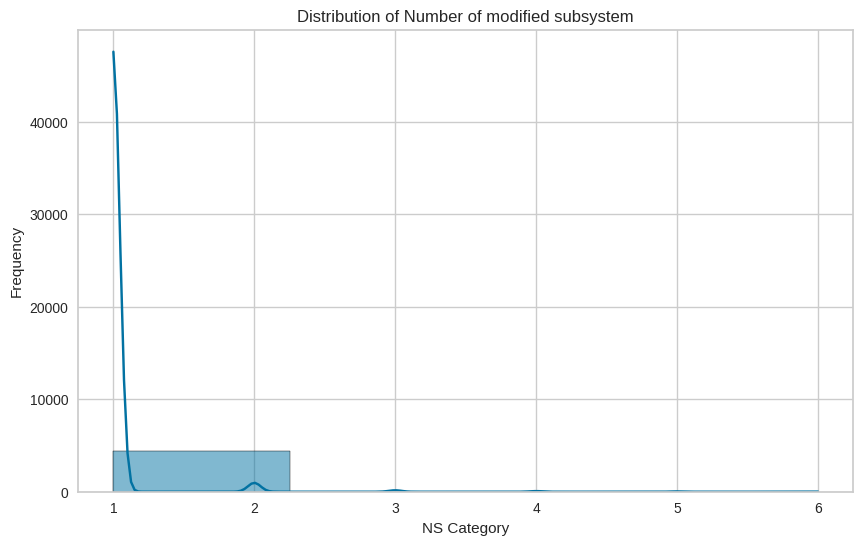

In [10]:
# Membuat plot distribusi dengan seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['ns'], kde=True, color="b", bins=4)

# Menambahkan judul dan label sumbu
plt.title('Distribution of Number of modified subsystem')
plt.xlabel('NS Category')
plt.ylabel('Frequency')

# Menampilkan plot
plt.show()

In [11]:
df['nm'].unique()

array([  2,   3,   1,   7,   5,   6,  55,   9,  28,   4,  21,  10,  14,
        39,  43,   8,  49,  19,  12, 252,  23,  24,  34,  17,  11,  51,
        82,  27,  30,  66,  95,  52,  36,  18,  20,  75, 124,  35,  15,
       175,  22,  38,  46,  13,  37,  32,  56,  42,  41,  26,  31,  16,
       131,  77])

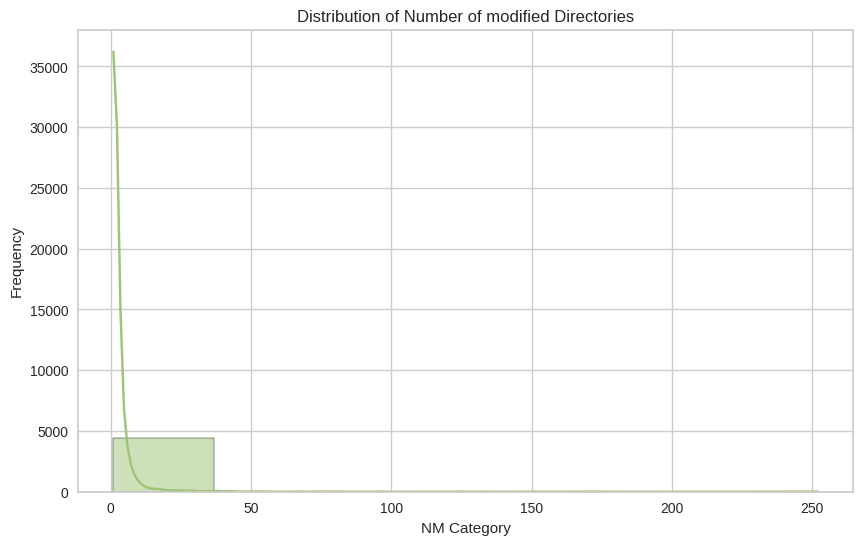

In [12]:
# Membuat plot distribusi dengan seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['nm'], kde=True, color="g", bins=7)

# Menambahkan judul dan label sumbu
plt.title('Distribution of Number of modified Directories')
plt.xlabel('NM Category')
plt.ylabel('Frequency')

# Menampilkan plot
plt.show()

In [13]:
df['nf'].unique()

array([   2,    3,    1,    4,    6,   12,    5,   11,  114,   13,  104,
          8,    7,  102,  143,   21,    9,   18,   10,  161,   20,   15,
        223,  325,   22,   63,   33, 1297,   55,   26,   14,   19,  148,
         51,   45,   44,   29,   54,   24,  214,   27,   25,   86,  158,
         17,   75,   43,   37,   98,  404,   94,  170,   78,   28,   16,
        134,  152,   32,  341,   64,   95,   40,   30,   31,   39,  482,
         34,   23,  208,   76,   47,  173,   57,   70,  123,  109,   46,
        180,  178,   52,   41,   42,   48,   36,   53,   92,  204,   79,
         88,   83,   68,  206,  193,   50,   61,  105,   73,   71,  121,
         93,   56,   35,   49,  828,  111,   69,  101,   38,   82,  264])

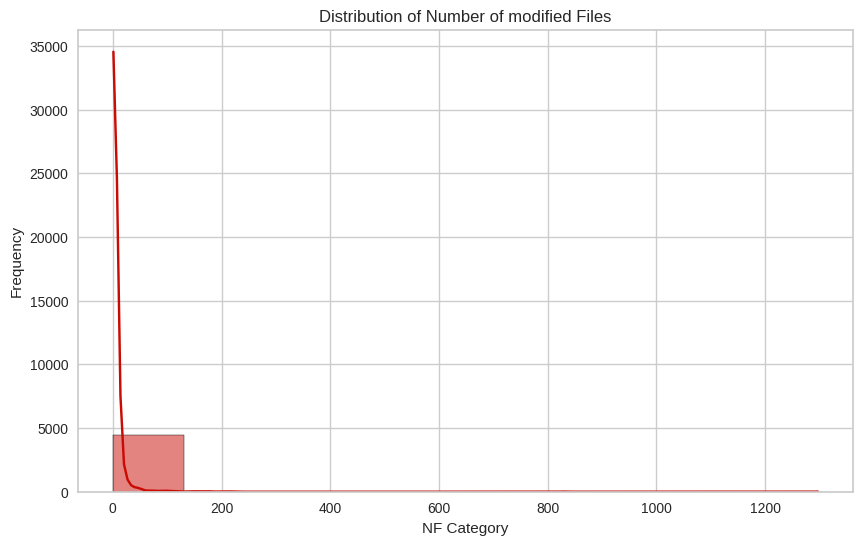

In [14]:
# Membuat plot distribusi dengan seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['nf'], kde=True, color="r", bins=10)

# Menambahkan judul dan label sumbu
plt.title('Distribution of Number of modified Files')
plt.xlabel('NF Category')
plt.ylabel('Frequency')

# Menampilkan plot
plt.show()

In [15]:
df['entropy'].unique()

array([0.954434  , 0.69329841, 0.        , ..., 0.57956062, 0.59952401,
       0.6832436 ])

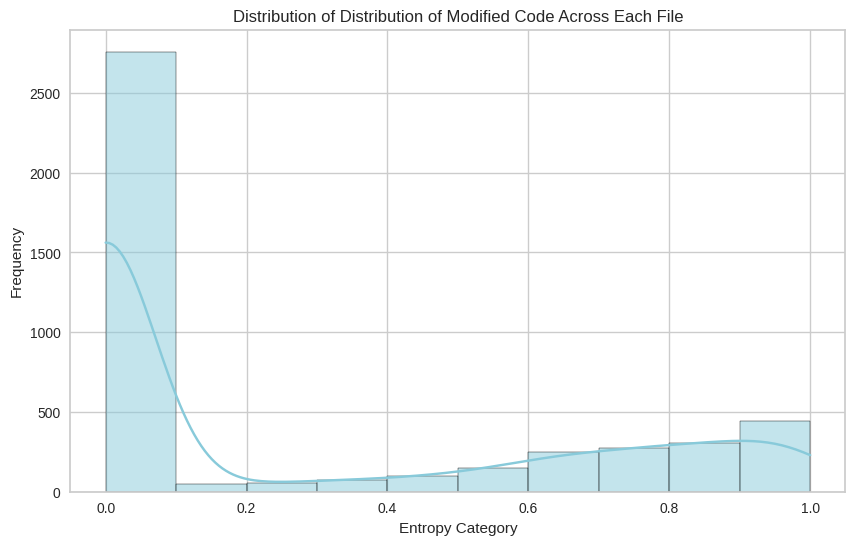

In [16]:
# Membuat plot distribusi dengan seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['entropy'], kde=True, color="c", bins=10)

# Menambahkan judul dan label sumbu
plt.title('Distribution of Distribution of Modified Code Across Each File')
plt.xlabel('Entropy Category')
plt.ylabel('Frequency')

# Menampilkan plot
plt.show()

In [17]:
df['la'].unique()

array([0.1025641 , 0.33333333, 0.09734513, ..., 0.04264706, 0.11302682,
       1.51948052])

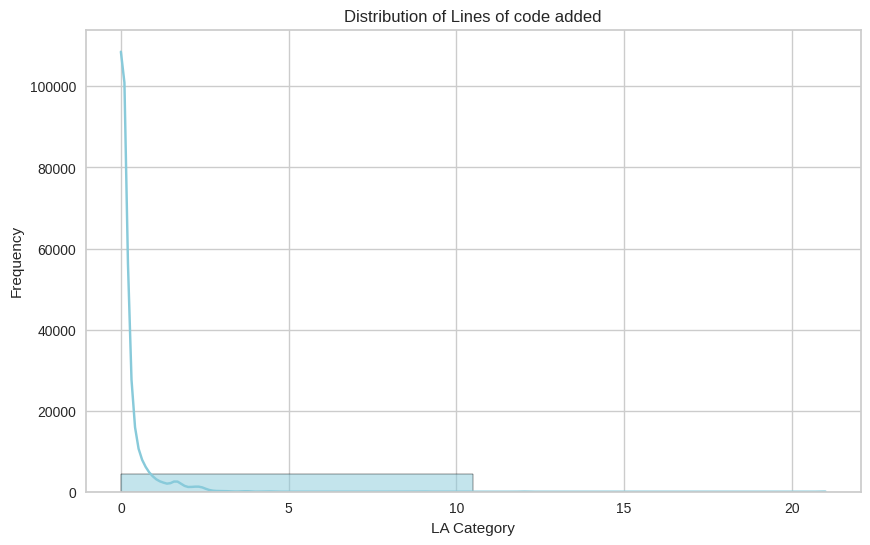

In [18]:
# Membuat plot distribusi dengan seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['la'], kde=True, color="c", bins=2)

# Menambahkan judul dan label sumbu
plt.title('Distribution of Lines of code added')
plt.xlabel('LA Category')
plt.ylabel('Frequency')

# Menampilkan plot
plt.show()

In [19]:
df['ld'].unique()

array([0.1025641 , 0.09150327, 0.04424779, ..., 0.09042553, 0.13088235,
       0.11781609])

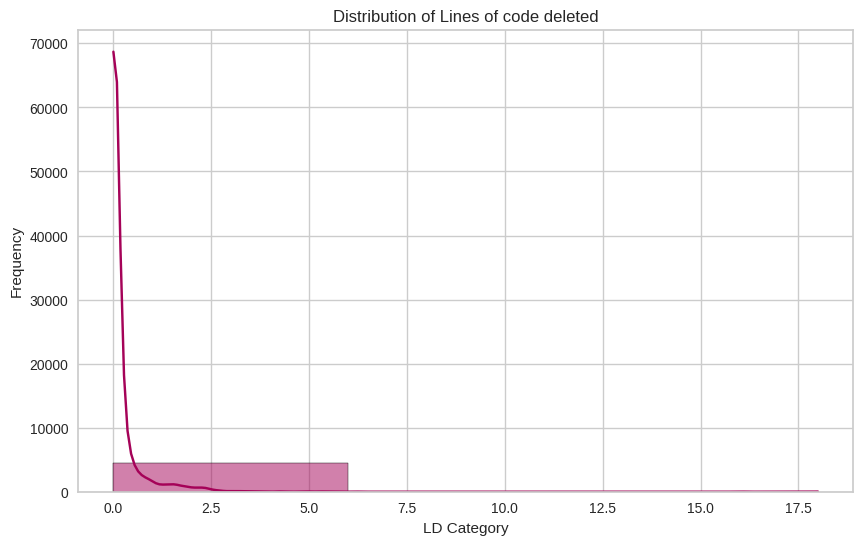

In [20]:
# Membuat plot distribusi dengan seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['ld'], kde=True, color="m", bins=3)

# Menambahkan judul dan label sumbu
plt.title('Distribution of Lines of code deleted')
plt.xlabel('LD Category')
plt.ylabel('Frequency')

# Menampilkan plot
plt.show()

In [21]:
df['lt'].unique()

array([ 39.       , 102.       , 113.       , ...,  18.5      ,
       216.5      , 149.1428571])

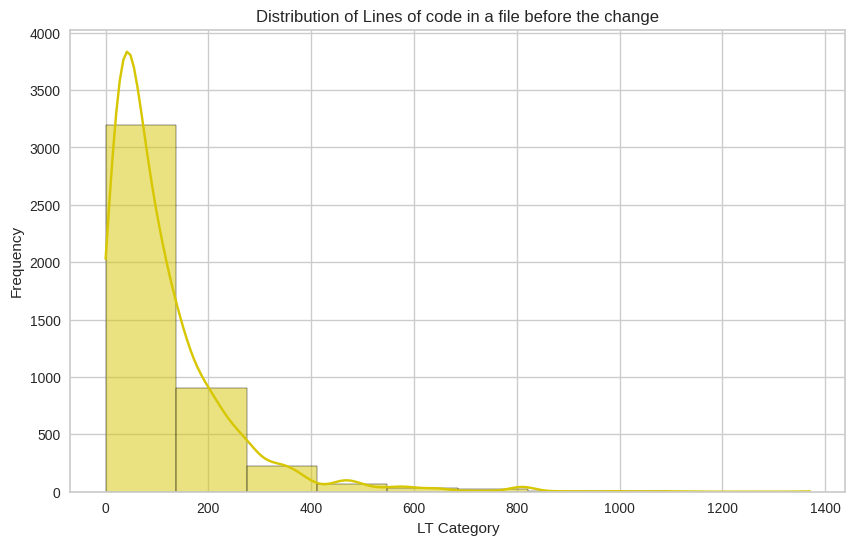

In [22]:
# Membuat plot distribusi dengan seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['lt'], kde=True, color="y", bins=10)

# Menambahkan judul dan label sumbu
plt.title('Distribution of Lines of code in a file before the change')
plt.xlabel('LT Category')
plt.ylabel('Frequency')

# Menampilkan plot
plt.show()

In [23]:
df['fix'].unique()

array([0, 1])

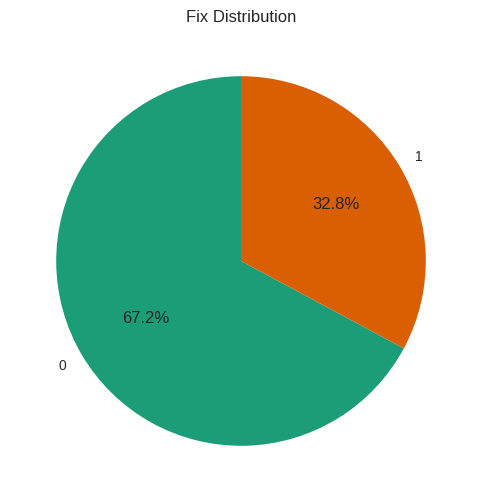

In [24]:
a=df['fix'].value_counts()

# Membuat pie diagram
plt.figure(figsize=(8, 6))
plt.pie(a, labels=a.index, autopct='%1.1f%%', colors=sns.color_palette('Dark2'), startangle=90)

# Menambahkan judul
plt.title('Fix Distribution')

# Menampilkan plot
plt.show()

In [25]:
df['ndev'].unique()

array([ 1,  6,  3,  8,  4,  5,  2,  7,  9, 15, 10, 11, 14, 13, 12])

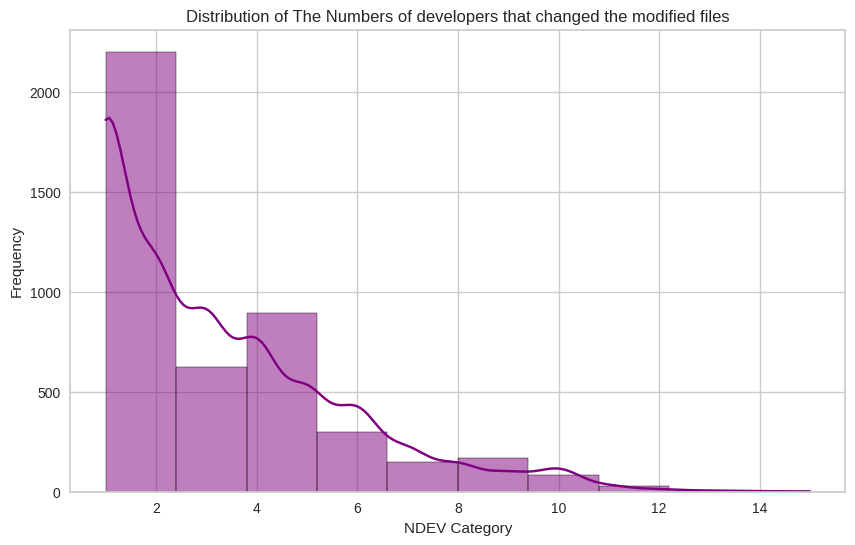

In [26]:
# Membuat plot distribusi dengan seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['ndev'], kde=True, color="purple", bins=10)

# Menambahkan judul dan label sumbu
plt.title('Distribution of The Numbers of developers that changed the modified files')
plt.xlabel('NDEV Category')
plt.ylabel('Frequency')

# Menampilkan plot
plt.show()

In [27]:
df['pd'].unique()

array([    53,     24,     41,     97,      8,    411,    125,     60,
          856,      7,    128,    389,    142,      6,     47,     19,
            1,      9,     23,    108,    304,      0,    598,    206,
          141,    479,     17,    338,     85,     34,      5,     82,
           64,    151,    233,    235,     74,    630,    430,     81,
          234,     21,     43,     57,    134,    158,    169,   1154,
           46,     79,     58,      4,     77,    242,     92,      2,
           29,     35,     93,     20,     30,    310,    133,     15,
           96,     84,    137,     28,     36,     25,     70,    147,
           56,     18, 238874,    349,     16,     55,     10,      3,
           48,   1734,    715,    597,     42,     12,     27,    713,
          406,    340,    171,     33,    520,   2551,   1342,     22,
          365,     98,    211,    261,    185,   1674,    114,    650,
           69,     65,    187,   4500,    710,   5007,    408,    620,
      

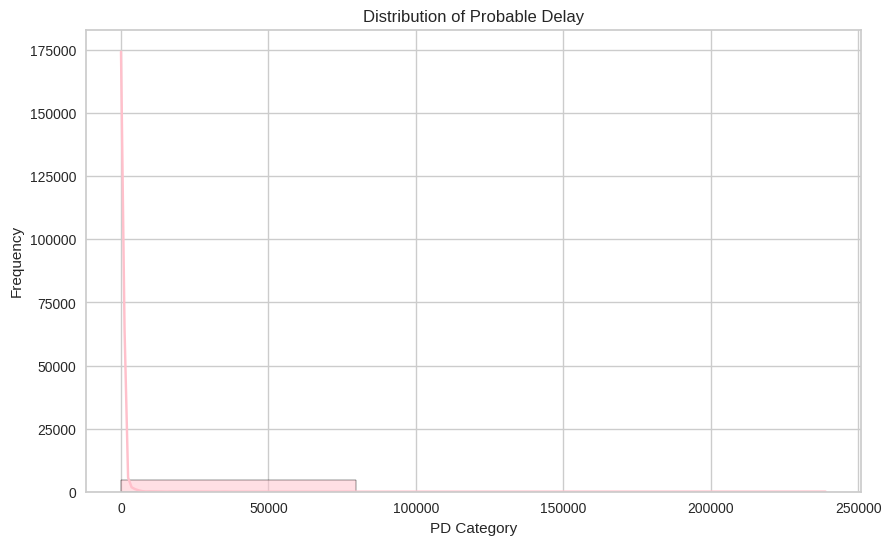

In [28]:
# Membuat plot distribusi dengan seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['pd'], kde=True, color="pink", bins=3)

# Menambahkan judul dan label sumbu
plt.title('Distribution of Probable Delay')
plt.xlabel('PD Category')
plt.ylabel('Frequency')

# Menampilkan plot
plt.show()

In [29]:
df['npt'].unique()

array([1.        , 0.83333333, 0.75      , 0.5       , 0.63636364,
       0.11403509, 0.38461538, 0.8       , 0.00961539, 0.125     ,
       0.2       , 0.33333333, 0.57142857, 0.00980392, 0.00699301,
       0.66666667, 0.71428571, 0.44444444, 0.00621118, 0.09090909,
       0.05      , 0.4       , 0.77777778, 0.61538461, 0.25      ,
       0.00448431, 0.58333333, 0.00307692, 0.08333333, 0.53333333,
       0.04545454, 0.01587302, 0.46666667, 0.03030303, 0.14285714,
       0.2767926 , 0.01818182, 0.16666667, 0.46153846, 0.1       ,
       0.6       , 0.42857143, 0.04761905, 0.36363636, 0.78947368,
       0.02027027, 0.43137255, 0.02222222, 0.68965517, 0.42307692,
       0.72222222, 0.54166667, 0.37850467, 0.26315789, 0.37037037,
       0.22222222, 0.3       , 0.41666667, 0.85714286, 0.52631579,
       0.55555556, 0.52      , 0.23255814, 0.20886076, 0.58823529,
       0.36      , 0.37333333, 0.28571429, 0.88888889, 0.86206897,
       0.11111111, 0.60465116, 0.9       , 0.4054054 , 0.56122

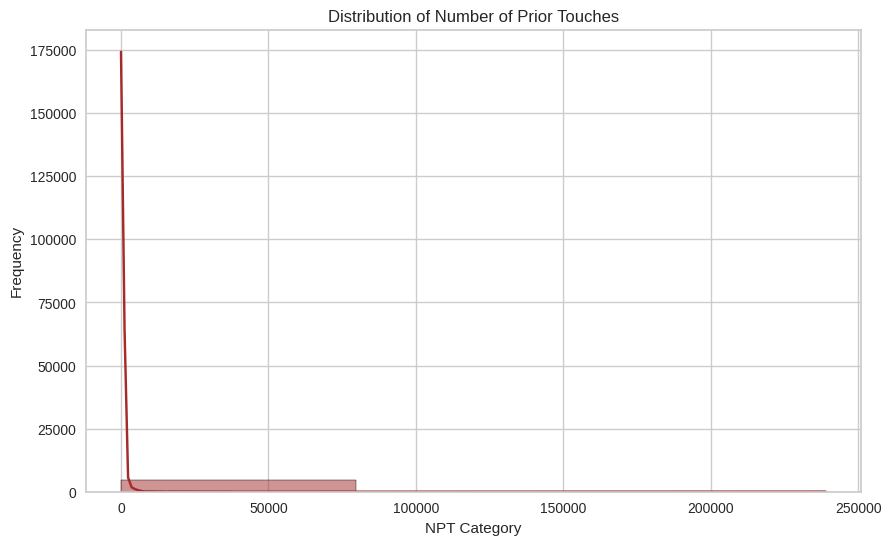

In [30]:
# Membuat plot distribusi dengan seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['pd'], kde=True, color="brown", bins=3)

# Menambahkan judul dan label sumbu
plt.title('Distribution of Number of Prior Touches')
plt.xlabel('NPT Category')
plt.ylabel('Frequency')

# Menampilkan plot
plt.show()

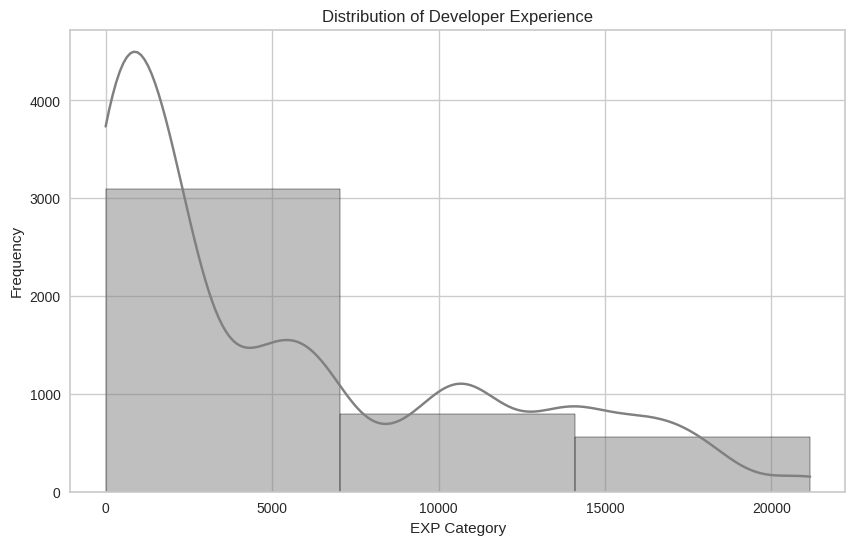

In [31]:
# Membuat plot distribusi dengan seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['exp'], kde=True, color="gray", bins=3)

# Menambahkan judul dan label sumbu
plt.title('Distribution of Developer Experience')
plt.xlabel('EXP Category')
plt.ylabel('Frequency')

# Menampilkan plot
plt.show()

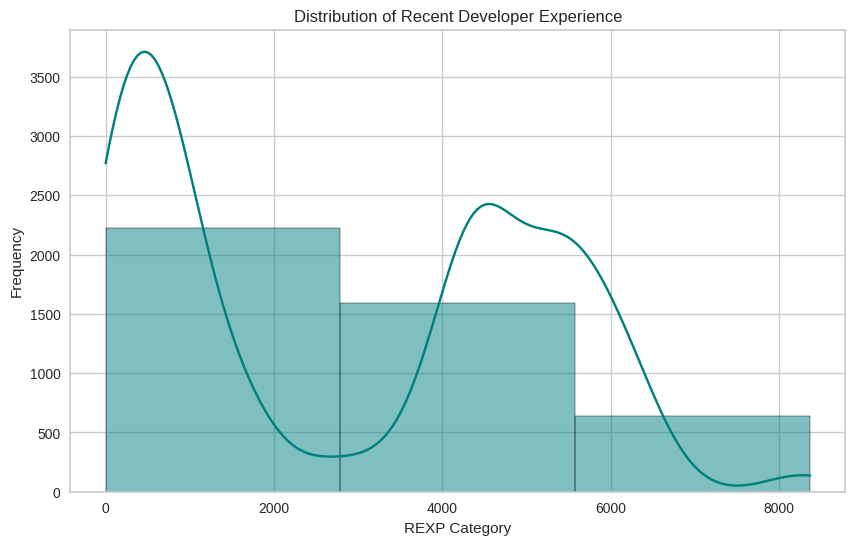

In [32]:
# Membuat plot distribusi dengan seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['rexp'], kde=True, color="teal", bins=3)

# Menambahkan judul dan label sumbu
plt.title('Distribution of Recent Developer Experience')
plt.xlabel('REXP Category')
plt.ylabel('Frequency')

# Menampilkan plot
plt.show()

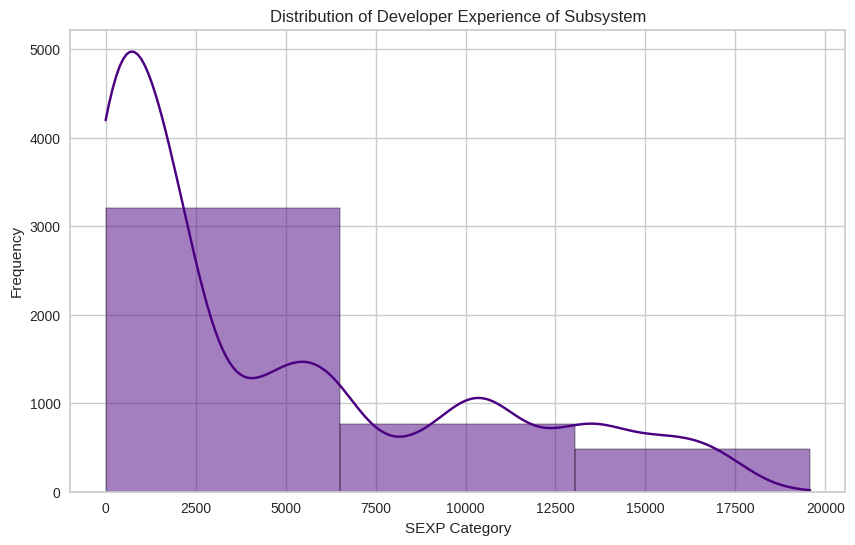

In [33]:
# Membuat plot distribusi dengan seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['sexp'], kde=True, color="indigo", bins=3)

# Menambahkan judul dan label sumbu
plt.title('Distribution of Developer Experience of Subsystem')
plt.xlabel('SEXP Category')
plt.ylabel('Frequency')

# Menampilkan plot
plt.show()

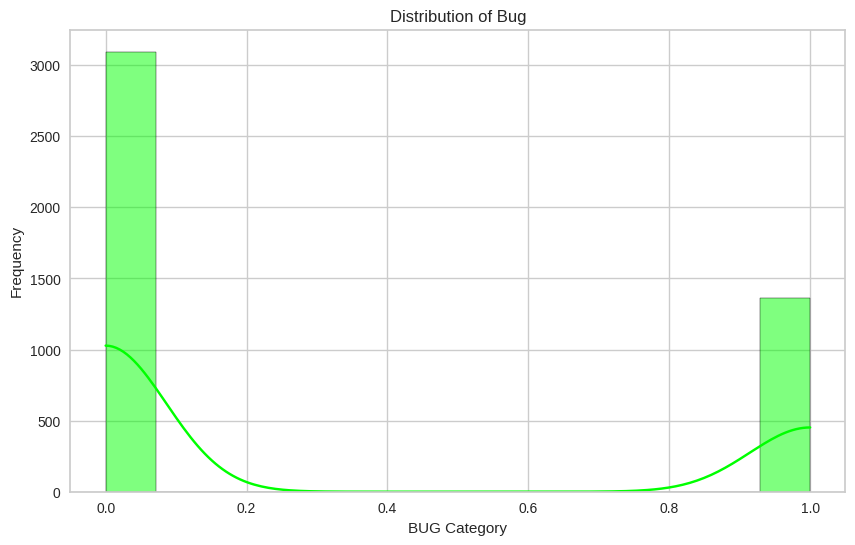

In [34]:
# Membuat plot distribusi dengan seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['bug'], kde=True, color="lime")

# Menambahkan judul dan label sumbu
plt.title('Distribution of Bug')
plt.xlabel('BUG Category')
plt.ylabel('Frequency')

# Menampilkan plot
plt.show()

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4455 entries, 0 to 4454
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionid  4455 non-null   int64  
 1   commitdate     4455 non-null   object 
 2   ns             4455 non-null   int64  
 3   nm             4455 non-null   int64  
 4   nf             4455 non-null   int64  
 5   entropy        4455 non-null   float64
 6   la             4455 non-null   float64
 7   ld             4455 non-null   float64
 8   lt             4455 non-null   float64
 9   fix            4455 non-null   int64  
 10  ndev           4455 non-null   int64  
 11  pd             4455 non-null   int64  
 12  npt            4455 non-null   float64
 13  exp            4455 non-null   int64  
 14  rexp           4455 non-null   float64
 15  sexp           4455 non-null   int64  
 16  bug            4455 non-null   int64  
dtypes: float64(6), int64(10), object(1)
memory usage: 59

In [36]:
df.isna().sum()

,0
transactionid,0
commitdate,0
ns,0
nm,0
nf,0
entropy,0
la,0
ld,0
lt,0
fix,0


In [37]:
df.drop(['transactionid', 'commitdate'], axis=1, inplace=True)
df.head()

,ns,nm,nf,entropy,la,ld,lt,fix,ndev,pd,npt,exp,rexp,sexp,bug
0,1,2,2,0.954434,0.102564,0.102564,39.0,0,1,53,1.0,21140,8343.008333,1188,0
1,1,3,3,0.693298,0.333333,0.091503,102.0,0,6,24,1.0,70,70.000000,70,0
2,1,1,1,0.000000,0.097345,0.044248,113.0,1,3,41,1.0,2402,713.716667,2396,0
3,1,3,4,0.894836,0.035484,0.034409,232.5,0,8,97,1.0,16307,5914.816667,15716,0
4,1,1,1,0.000000,0.103234,0.004975,804.0,0,4,8,1.0,1778,712.283333,1774,1


In [38]:
df['bug'].value_counts()

,count
bug,
0,3094
1,1361


#4. Training

In [39]:
clf = setup(
    data=df,
    target='bug',
    session_id=101,
    fix_imbalance=True,
    fix_imbalance_method='smote',
    fold=10,
    verbose=True
)

,Description,Value
0,Session id,101
1,Target,bug
2,Target type,Binary
3,Original data shape,"(4455, 15)"
4,Transformed data shape,"(5667, 15)"
5,Transformed train set shape,"(4330, 15)"
6,Transformed test set shape,"(1337, 15)"
7,Numeric features,14
8,Preprocess,True
9,Imputation type,simple


In [40]:
# 6. Bandingkan semua model dan ambil model terbaik
best_model = compare_models(sort='Accuracy', exclude=['dummy'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7611,0.7963,0.5413,0.6275,0.5799,0.4145,0.4176,0.6910
xgboost,Extreme Gradient Boosting,0.7572,0.7827,0.5529,0.6146,0.5811,0.4111,0.4129,0.2730
gbc,Gradient Boosting Classifier,0.7537,0.7929,0.5791,0.6012,0.5888,0.4133,0.4143,1.3130
rf,Random Forest Classifier,0.7527,0.7850,0.5645,0.6045,0.5821,0.4071,0.4088,1.0900
et,Extra Trees Classifier,0.7495,0.7763,0.5571,0.5975,0.5755,0.3984,0.3996,0.6860
ada,Ada Boost Classifier,0.7331,0.7633,0.6180,0.5587,0.5859,0.3901,0.3918,0.3480
qda,Quadratic Discriminant Analysis,0.7219,0.7238,0.4754,0.5606,0.5058,0.3167,0.3233,0.0970
lr,Logistic Regression,0.6944,0.7240,0.5927,0.5001,0.5412,0.3148,0.3184,1.2780
dt,Decision Tree Classifier,0.6899,0.6518,0.5539,0.4936,0.5214,0.2933,0.2949,0.0800
lda,Linear Discriminant Analysis,0.6899,0.7264,0.6190,0.4943,0.5492,0.3175,0.3225,0.0490


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [41]:
lightgbm= create_model('lightgbm')
tuned_lightgbm = tune_model(lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7532,0.7974,0.4842,0.6216,0.5444,0.3787,0.3843
1,0.7788,0.7901,0.5895,0.6512,0.6188,0.4636,0.4647
2,0.7724,0.7876,0.5368,0.6538,0.5896,0.4343,0.4383
3,0.7532,0.7812,0.5263,0.6098,0.5650,0.3940,0.3961
4,0.7564,0.7879,0.4632,0.6377,0.5366,0.3770,0.3858
5,0.7821,0.7967,0.5938,0.6628,0.6264,0.4732,0.4746
6,0.7788,0.8251,0.5625,0.6667,0.6102,0.4574,0.4606
7,0.7500,0.8048,0.6146,0.5900,0.6020,0.4199,0.4201
8,0.7492,0.8076,0.4947,0.6104,0.5465,0.3758,0.3798


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7596,0.7945,0.5158,0.6282,0.5665,0.4024,0.4061
1,0.7853,0.8073,0.5789,0.6707,0.6215,0.4727,0.4752
2,0.7404,0.7786,0.4947,0.5875,0.5371,0.3586,0.3611
3,0.7436,0.7829,0.5158,0.5904,0.5506,0.3723,0.3740
4,0.7436,0.7971,0.4211,0.6154,0.5000,0.3356,0.3466
5,0.7724,0.8122,0.5833,0.6437,0.6120,0.4516,0.4527
6,0.7724,0.8285,0.5521,0.6543,0.5989,0.4416,0.4447
7,0.7596,0.8091,0.6250,0.6061,0.6154,0.4406,0.4407
8,0.7814,0.8078,0.6105,0.6517,0.6304,0.4754,0.4759


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [42]:
# 7. Finalisasi model terbaik
final_model = finalize_model(tuned_lightgbm)

In [43]:
# 8. Evaluasi model dengan berbagai plot
evaluate_model(final_model)  # akan menampilkan GUI dengan berbagai evaluasi (ROC, Confusion Matrix, dll)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [44]:
# 9. Simpan model ke Google Drive
model_path = '/content/drive/MyDrive/S2/Semester III/Software Quality & Effort Estimation/Tugas/Tugas III/Cross Project Defect Prediction/Model/columba_best_model'
save_model(final_model, model_path)

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['ns', 'nm', 'nf', 'entropy', 'la',
                                              'ld', 'lt', 'fix', 'ndev', 'pd',
                                              'npt', 'exp', 'rexp', 'sexp'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer'...
                                 boosting_type='gbdt', class_weight=None,
                      